# Intro

This notebook is an abridged intro to pytorch, based on:

https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)

and to the concepts underlying neural networks, based on:

https://adventuresinmachinelearning.com/neural-networks-tutorial
        

# Imports

In [264]:
import torch
import numpy as np

# Getting started with pytorch

## Making tensors

In [85]:
torch.empty(5, 3)

tensor([[1.4013e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [86]:
torch.Tensor(3, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [87]:
torch.rand(3, 3)

tensor([[0.0831, 0.5218, 0.9536],
        [0.4392, 0.0128, 0.0129],
        [0.6403, 0.6296, 0.5184]])

Slicing tensors -- just like numpy arrays!

In [134]:
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [137]:
x.size()

torch.Size([2])

In [174]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU


# if torch.cuda.is_available():
#     device = torch.device("cuda")          # a CUDA device object
#     y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
#     x = x.to(device)                       # or just use strings ``.to("cuda")``
#     z = x + y
#     print(z)
#     print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

## Tensor operations

### make some tensors

In [88]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [89]:
torch.ones(3,3) * 4

tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])

### add, multiply, etc

In [15]:
c + d

tensor([[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]])

In [18]:
c * 3 + d

tensor([[7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.]])

In [21]:
c - d / 2

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]])

### select slices of tensors

In [90]:
torch.rand(3,3) * 5

tensor([[3.0840, 1.4290, 3.3018],
        [2.3605, 0.9498, 1.8492],
        [1.5812, 1.2349, 1.7169]])

In [91]:
m[0, :2]

tensor([0.0324, 0.7604])

In [92]:
m[1:2, :]

tensor([[0.6867, 4.8761, 3.6670]])

Can easily convert tensors to numpy arrays

In [178]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [179]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


Your array will keep up with your tensor updates !!!!

In [180]:
a.add_(1)

tensor([2., 2., 2., 2., 2.])

In [181]:
a

tensor([2., 2., 2., 2., 2.])

In [182]:
b

array([2., 2., 2., 2., 2.], dtype=float32)

^^ All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

In [236]:
# CUDA Tensors - Tensors can be moved onto any device using the .to method.

# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU

# if torch.cuda.is_available():
#     device = torch.device("cuda")          # a CUDA device object
#     y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
#     x = x.to(device)                       # or just use strings ``.to("cuda")``
#     z = x + y
#     print(z)
#     print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

### AUTOGRAD: Automatic Differentiation

Here, we'll use Autograd to track our tensor operations! 

(autograd documentation: https://pytorch.org/docs/stable/autograd.html#function)

In [230]:
# torch.tensor is the main class of the package
# to track operations on a tensor, set requires_grad to True

# When you finish your computation you can call .backward() and have all the gradients computed automatically.

# The gradient for this tensor will be accumulated into .grad attribute.

x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [225]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [226]:
print(y.grad_fn)

In [227]:
z   = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


Now, let's do backpropagation

In [228]:
out.backward()

Print gradients d(out)/dx

In [229]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


What's backpropagation? There are some links below that will help explain, but the next part of this tutorial will also help!


https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/


http://www.emergentmind.com/neural-network

# Neural Networks

reference: https://adventuresinmachinelearning.com/neural-networks-tutorial/

### The artifical neuron

The biological neuron is simulated in an ANN by an activation function. 

In classification tasks, this activation function has to have a “switch on” characteristic. Once the input is greater than a certain value, the output should change state (i.e. from 0 to 1). 

This simulates the “turning on” of a biological neuron. 

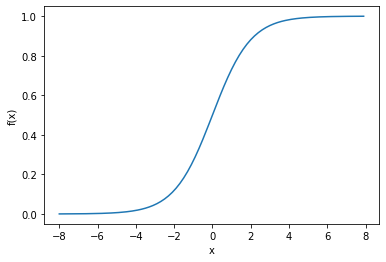

In [233]:
# A common activation function that is used is the sigmoid function:

import matplotlib.pylab as plt
import numpy as np
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Nodes

Neurons have connected hierarchical networks, with the outputs of some neurons being the inputs to others. We represent these networks as connected layers of nodes. 

Each node takes multiple weighted inputs, applies the activation function to the summation of these inputs, and, in doing so, generates an output. 

![a](figs/c.png)


The circle represents a node. It takes the weighted inputs, sums them, inputs them to the activation function, and produces an output.

The weights are real valued numbers (i.e. not binary 1s or 0s), which are multiplied by the inputs and then summed up in the node. 

The weighted input to the node above would be:

![a](figs/a.png)


The weights are variables that get changed during learning.  

The `b` is the weight of the +1 bias element. Including bias enhances the flexibility of the node...

### Bias

Let’s take an extremely simple node, with only one input and one output:

![a](figs/b.png)

The input to the activation function of the node in this case is simply 
x1 * w1 .  

What does changing the weight do in this simple network?

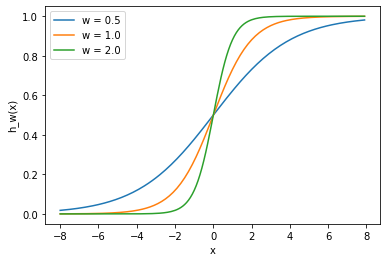

In [240]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'
for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1 / (1 + np.exp(-x*w))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)
plt.show()

### Change in weight --> change in slope of sigmoid function
(useful to model different strengths of relationships between the input and output).  

### What if we only want the output to change when x is greater than 1?  

![a](figs/bias.png)

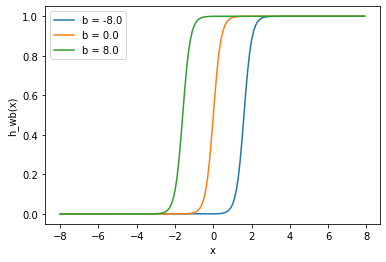

In [243]:
# bias essentially lets you model a conditional relationship 
# if x > z, then 1; else 0

w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1 + np.exp(-(x*w+b)))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc=2)
plt.show()

### Putting the pieces together...

There are many interconnected nodes in a full neural network. They exist in a myriad of forms. The most common simple neural network structure has three layers: 

- input
- hidden
- output

![a](figs/network.png)

Layer 1 - input layer, where the external input data enters the network. 

Layer 2 - hidden layer; not part of the input or output. 

Layer 3 - output layer. 

Each node in L1 has a connection to all the nodes in L2. Likewise for the nodes in L2 to the single output node L3. Each of these connections will have an associated weight.

# Feed Forward Pass

Let's focus on the three layer neural network we talked about. 

Here it is, re-written in equation form:

![a](figs/ff.png)

In the equation above, `f`  refers to the node activation function (in our case : sigmoid function). 

The first line, `h1` is the output of the first node in the second layer

The final line is the output of the only node in the third layer (the ultimate output of the network).

### Feed - Forward example

First, lets make weights 

(use a matrix for the first set of weights, and an array for second set of weights)

In [265]:
w1 = np.array([[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6]])
w2 = np.zeros((1, 3))
w2[0,:] = np.array([0.5, 0.5, 0.5])

And also assign bias (input and hidden layers)

In [266]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

Also make function for sigmoid activation function

In [267]:
def f(x):
    return 1 / (1 + np.exp(-x))

Make weights, bias, and input 

In [261]:
w = [w1, w2]
b = [b1, b2]
#a dummy x input vector
x = [1.5, 2.0, 3.0]

Simple matrix calculation can give you the feed forward result

![matrix_mult!](figs/matrix_mult.png)

In [262]:
def matrix_feed_forward_calc(n_layers, x, w, b):
    
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

In [263]:
matrix_feed_forward_calc(3, x, w, b)

array([0.83545566])

### Gradient Descent and Optimization

Setting the weights which link the layers in the network is what constitutes "training". 

In supervised learning, we aim to reduce the error of the output (via loss function).

Given the error in our output, we use gradient descent to decide how to vary the weights. 

Info on different types of loss functions here: https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718

![matrix_mult!](figs/grad_1d.png)
![matrix_mult!](figs/grad_2d.png)

### Backpropagation

The way we figure out the gradient of a neural network is via backpropagation. We start from the output layer and propagate backwards, updating weights and biases for each layer.

The idea is simple: adjust the weights and biases throughout the network, so that we get an output that is closer to the desired output. 

The examples starting at 7:55 in this video give a good intuition for backpropagation:

https://www.youtube.com/watch?v=nFTQ7kHQWtc&feature=youtu.be&t=475

### TRAINING YOUR NETWORK

You want to start with randomly initialized weights for each layer. Then you will iteratively update / train your network. 


A typical training procedure for a neural network is as follows:

+ Define the neural network that has some learnable parameters (or weights)
+ Iterate over a dataset of inputs
    + Process input through the network
    + Compute the loss (how far is the output from being correct)
    + Propagate gradients back into the network’s parameters
    + Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient


##### section 4.9 : https://adventuresinmachinelearning.com/neural-networks-tutorial/

### Alternatives

Gradient descent is popular, but it's not the only way to train a network! 

Here is a discussion of five options: 


https://www.neuraldesigner.com/blog/5_algorithms_to_train_a_neural_network#GradientDescent

### Making a Neural Network in Pytorch :

text:

https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

co-laboratory notebook: 

https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/neural_networks_tutorial.ipynb

### Making a Classifier in Pytorch: 
Convolutional neural network for image classification

https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/cifar10_tutorial.ipynb

"Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers." wiki: https://en.wikipedia.org/wiki/Convolutional_neural_network

### Optional tutorial on "data paralellism":
learn how to use multiple GPUs with `DataParallel`

https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html#sphx-glr-beginner-blitz-data-parallel-tutorial-py